In [3]:
import torch
import pickle
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
from soft_thresholding.SoftThresholdNet import SoftThresholdNet

from duffing_dataset import *

In [4]:
with open('data/duffing/duffing_dataset.pickle', 'rb') as f:
    train_data = pickle.load(f)

with open('data/duffing/duffing_dataset_test.pickle', 'rb') as f:
    test_data = pickle.load(f)

In [5]:
t_train = torch.linspace(0, train_data.DT * len(train_data.x), len(train_data.y))
t_test = torch.linspace(0, test_data.DT * len(test_data.x), len(test_data.y))

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(test_data, shuffle=True)

In [18]:
model = SoftThresholdNet(3, [[10, 10], [10, 10]], 2, s_init=1)

In [19]:
model.train_n_epochs(data_loader=train_loader, n_epochs = 1000, lr = 0.001, weight_decay=0.0001, verbose=True)

Epoch 0: loss 0.9601898789405823
Sparsity: 0.5559999942779541 

Epoch 100: loss 0.08258645236492157
Sparsity: 0.7400000095367432 

Epoch 200: loss 0.114482581615448
Sparsity: 0.7599999904632568 

Epoch 300: loss 0.13391727209091187
Sparsity: 0.7639999985694885 

Epoch 400: loss 0.1424843817949295
Sparsity: 0.7639999985694885 

Epoch 500: loss 0.14719781279563904
Sparsity: 0.7639999985694885 

Epoch 600: loss 0.08945570141077042
Sparsity: 0.7639999985694885 

Epoch 700: loss 0.09566166996955872
Sparsity: 0.7839999794960022 

Epoch 800: loss 0.36708471179008484
Sparsity: 0.7839999794960022 

Epoch 900: loss 0.42941105365753174
Sparsity: 0.7839999794960022 



In [20]:
y_pred = model(test_loader.dataset.x)

In [21]:
torch.sum((y_pred - test_loader.dataset.y)**2) / len(test_loader.dataset.y)

tensor(0.3637, grad_fn=<DivBackward0>)

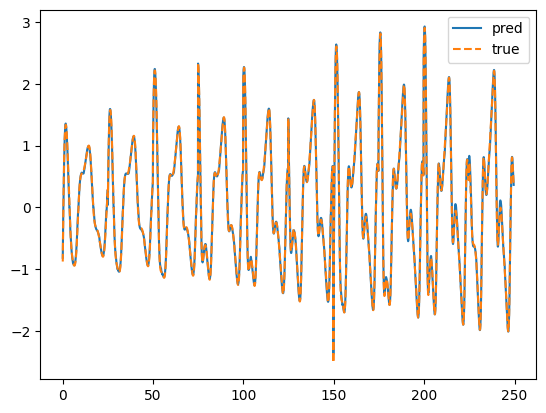

In [22]:
plt.plot(t_test, y_pred[:, 0].detach().numpy(), label='pred')
plt.plot(t_test, test_loader.dataset.y[:, 0].detach().numpy(), label='true', linestyle='--')
plt.legend()

In [23]:
s_threshhold = [layer.s.detach().item() for layer in model.layers]

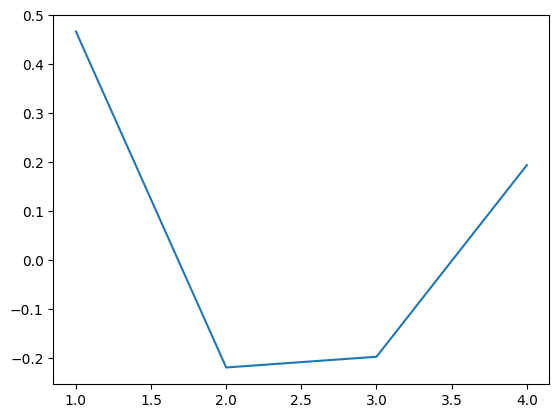

In [24]:
plt.plot(np.linspace(1, len(s_threshhold), len(s_threshhold)), s_threshhold)

In [25]:
model.get_sparsity()

0.7839999794960022

In [26]:
sparsity = [layer.get_sparsity() for layer in model.layers]

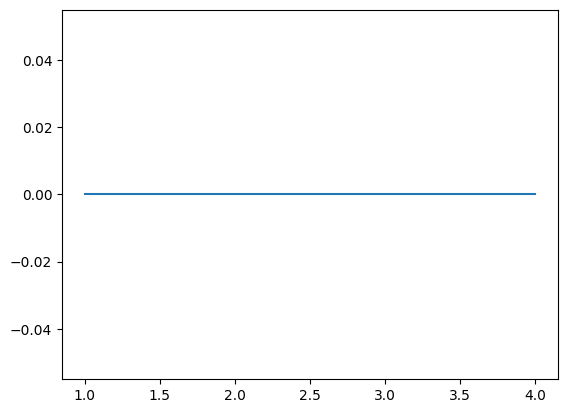

In [27]:
plt.plot(np.linspace(1, len(sparsity), len(sparsity)), sparsity)